## **Author : Pijush Bhuyan**

## Computer Vision Intern at The Sparks Foundation

## Task 2 - Color Identification in Images

## Part 1 - Importing Libraries

Here we import the necessary libraries required for this project

We import **matplotlib.pyplot** to plot pie charts and display images

**numpy** is used for handling images as 2D arrays

opencV i.e. **cv2** is used for loading and preprocessing the images

**sklearn.cluster** contains the necessary implemented k-means model used for this project

**Counter** present in collections is used to count the occurences of elements in a particular cluster

**rgb2lab** is used to convert the color in cie color space which is used by **deltaE_cie76** to compare the similarity of two colors

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import cv2 as cv
from sklearn.cluster import KMeans
from collections import Counter
from skimage.color import rgb2lab, deltaE_cie76

## Part 2 - Defining Helper Functions

Here we define two helper functions **getImage** and **RGB2HEX**

The former loads an image at the specified path, converts into required rgb colorspace and resizes the image to a suitable resolution that helps k-means to run efficiently. Finally it returns the preprocessed image as a 2D numpy array in rgb channels

The latter simply converts an input color as a 1D vector in rgb format into hexadecimal string which is used when we plot the pie chart later on

In [ ]:
# function that loads an image and returns it in rgb format
def getImage(path):
  img = cv.imread(path)
  img_cvt = cv.cvtColor(img,cv.COLOR_BGR2RGB)
  img_resized = cv.resize(img_cvt,(640,480),interpolation=cv.INTER_AREA)
  return img_resized

# function to convert rgb to a hex string
def RGB2HEX(color):
   return "#{:02x}{:02x}{:02x}".format(int(color[0]), int(color[1]), int(color[2]))

## Part 3 - Using K-Means Clustering to Extract Top Colors from an Image

Here we implement a function **getTopColors** which takes the folowing parameters as input -


*   image - an rgb image as a 2D numpy array
*   no_of_colors - how many colors we want to extract
*   show_chart - optional parameter that prints the pie chart showing the distribution of various colors extracted


In [ ]:
# function that extracts top colors present in a image using K-Means clustering and returns them in rgb format
def getTopColors(image,no_of_colors=5,show_chart=False):
  pixel_data = image.reshape((image.shape[0]*image.shape[1],3))
  clf = KMeans(no_of_colors)
  clf.fit_predict(pixel_data)
  count = Counter(clf.labels_)
  color_centers = clf.cluster_centers_
  ordered_colors = [color_centers[i] for i in count.keys()]
  hex_colors = [RGB2HEX(ordered_colors[i]) for i in count.keys()]
  rgb_colors = [ordered_colors[i] for i in count.keys()]
  if(show_chart):
    plt.figure(figsize = (8, 6))
    plt.pie(count.values(), labels = hex_colors, colors = hex_colors)
  return np.array(rgb_colors,dtype='uint8')
  # return rgb_colors

## Part 4 - Testing on a Sample Image

Here we test the implemented function to extract **top five colors** from the sample image that was taken my be a few years back

We can see that the clustering algorithm has been able to detect **two shades each of green and brown and one shade of pink from the image**

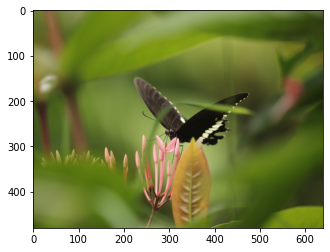

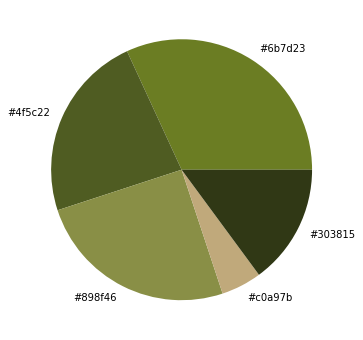

In [ ]:
image = getImage("20180731124000_IMG_4677.JPG")
plt.imshow(image)
colors = getTopColors(image,5,True)

## Part 5 - Filtering Images using a Target Color

In the remaining section we apply the above functionalities to filter some sample images taken from Unsplash by matching them a to a target color

In [ ]:
# load multiple images for filtering according to color
import os
IMAGE_DIRECTORY = 'images'
COLORS = {
    'GREEN': [0, 128, 0],
    'BLUE': [0, 0, 128],
    'YELLOW': [255, 255, 0],
    'RED' : [128,0,0]
}
images = []

for file in os.listdir(IMAGE_DIRECTORY):
    if not file.startswith('.'):
        images.append(getImage(os.path.join(IMAGE_DIRECTORY, file)))


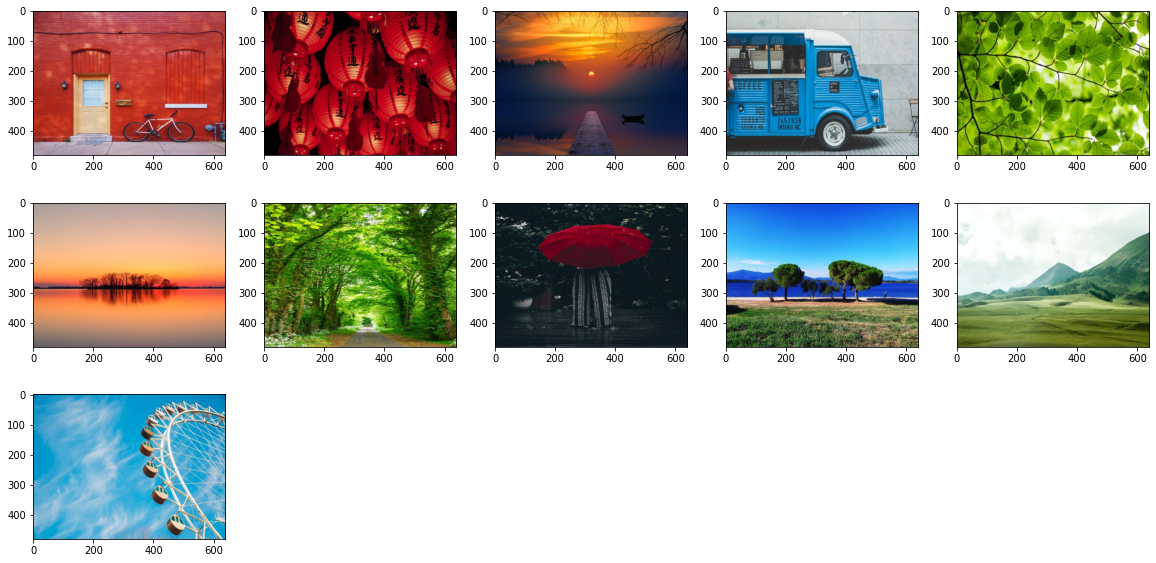

In [ ]:
# display the images 
plt.figure(figsize=(20, 10))
for i in range(len(images)):
    plt.subplot(len(images)//5+1,5,i+1)
    plt.imshow(images[i])

In [ ]:
# function to check whether a particular image contains a specific color
def matchImageByColor(image, color, threshold = 60, number_of_colors = 10): 
    
    image_colors = getTopColors(image, number_of_colors, False)
    selected_color = rgb2lab(np.uint8(np.asarray([[color]])))

    select_image = False
    for i in range(number_of_colors):
        curr_color = rgb2lab(np.uint8(np.asarray([[image_colors[i]]])))
        diff = deltaE_cie76(selected_color, curr_color)
        if (diff < threshold):
            select_image = True
    
    return select_image

In [ ]:
# function to filter images containing a particular color
def showSelectedImages(images, color, threshold, colors_to_match):
    selected = []
    index=0
    for i in range(len(images)):
        selected.append( matchImageByColor(images[i],color,threshold,colors_to_match))
    status,count = np.unique(selected,return_counts=True)
    for i in range(len(images)):
      if(selected[i]):
        index+=1
        plt.subplot(count[1]//5+1, 5,index)
        plt.imshow(images[i])

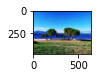

In [ ]:
showSelectedImages(images,COLORS['BLUE'],40,5)

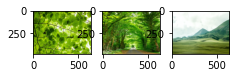

In [ ]:
showSelectedImages(images,COLORS['GREEN'],40,5)

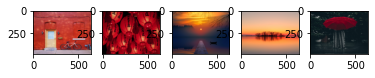

In [ ]:
showSelectedImages(images,COLOR['RED'],40,5)

We can see that our model can detect colors quite accurately and filter most of the images according to a target color. However we can see that it failed to identy two images which had majority shades of blue. You can try adujsting the tolerence values while comparing the similarity between colors and try adjusting the reference shades to get desired output.

**Thank You**